<a href="https://colab.research.google.com/github/SriVidyaYeluripati/24WS-mmd-code-public/blob/main/e09_g24_Yeluripati_Kamat_Bhadsavale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment done by

- Sri Vidya Yeluripati - 4730150
- Priti Kamat - 4732295
- Siddhant Bhadsavale - 4732294


## **Exercise 1: PageRank on a Simple Graph**

### **a) Compute PageRank using Flow/Matrix Formulation**


PageRank measures the importance of nodes in a graph based on the link structure. Without teleportation, the PageRank computation involves modeling the graph as a Markov chain and using the transition matrix to distribute rank values iteratively.

**Step 1:** Define the **transition matrix $ M $**.

Given the graph with nodes $ a $, $ b $, and $ c $:

- Node $ a $ links to $ b $ and $ c $ → **out-degree** of $ a $ = 2  
- Node $ b $ links to $ a $ → **out-degree** of $ b $ = 1  
- Node $ c $ links to $ a $ and $ b $ → **out-degree** of $ c $ = 2  

The transition probabilities for moving from one node to another are calculated as:

$$
M =
\begin{bmatrix}
0 & 1 & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & 0 & 0
\end{bmatrix}
$$

**Step 2:** Apply the **Power Iteration method** with $ \varepsilon = \frac{1}{12} $.

Start with an initial uniform rank vector:

$$
r^{(0)} = \begin{bmatrix} \frac{1}{3} \\ \frac{1}{3} \\ \frac{1}{3} \end{bmatrix}
$$

**First Iteration:**  
$$
r^{(1)} = M \cdot r^{(0)} = \begin{bmatrix}
1 \cdot \frac{1}{3} + \frac{1}{2} \cdot \frac{1}{3} \\
\frac{1}{2} \cdot \frac{1}{3} + \frac{1}{2} \cdot \frac{1}{3} \\
\frac{1}{2} \cdot \frac{1}{3}
\end{bmatrix} = \begin{bmatrix}
\frac{1}{2} \\
\frac{1}{3} \\
\frac{1}{6}
\end{bmatrix}
$$

**Second Iteration:**  
$$
r^{(2)} = M \cdot r^{(1)} = \begin{bmatrix}
\frac{1}{3} + \frac{1}{2} \cdot \frac{1}{6} \\
\frac{1}{2} \cdot \frac{1}{2} + \frac{1}{2} \cdot \frac{1}{6} \\
\frac{1}{2} \cdot \frac{1}{2}
\end{bmatrix} = \begin{bmatrix}
\frac{5}{12} \\
\frac{1}{3} \\
\frac{1}{4}
\end{bmatrix}
$$

Continue until convergence.

---

### **b) Stationary Distribution**


The stationary distribution represents the long-term PageRank values. Solving $ M \cdot r = r $ gives this distribution.

**Equations from $ M \cdot r = r $:**

1. $ r_a = r_b + \frac{1}{2} r_c $  
2. $ r_b = \frac{1}{2} r_a + \frac{1}{2} r_c $  
3. $ r_c = \frac{1}{2} r_a $  
4. $ r_a + r_b + r_c = 1 $  

**Solving step-by-step:**

From (3): $ r_c = \frac{1}{2} r_a $  
From (1): $ r_a = r_b + \frac{1}{4} r_a $ → $ r_b = \frac{3}{4} r_a $

Normalization:

$$
r_a + r_b + r_c = r_a + \frac{3}{4} r_a + \frac{1}{2} r_a = \frac{9}{4} r_a = 1
$$

$$
r_a = \frac{4}{9}, \quad r_b = \frac{1}{3}, \quad r_c = \frac{2}{9}
$$

**Final Answer:**

$$
r = \begin{bmatrix} \frac{4}{9} \\ \frac{1}{3} \\ \frac{2}{9} \end{bmatrix}
$$

---

### **c) PageRank with Random Teleports ($ \beta = 0.8 $)**


Teleportation prevents dead ends and spider traps by allowing random jumps. The Google matrix is:

$$
A = \beta M + (1 - \beta) \cdot \frac{1}{3} E
$$

For $ \beta = 0.8 $:

$$
A = 0.8 \cdot M + 0.2 \cdot \frac{1}{3}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

$$
A =
\begin{bmatrix}
0.0667 & 0.8667 & 0.4333 \\
0.4333 & 0.0667 & 0.4333 \\
0.4333 & 0.0667 & 0.0667
\end{bmatrix}
$$

Using Power Iteration, the stationary distribution becomes:

$$
r = \begin{bmatrix} 0.4556 \\ 0.3111 \\ 0.2333 \end{bmatrix}
$$

---

### **d) Stationary Distribution with Teleports**

**Final Answer:**

$$
r = \begin{bmatrix} 0.4556 \\ 0.3111 \\ 0.2333 \end{bmatrix}
$$




### **Exercise 2: PageRank in a Clique with an Extra Node**

We are given a graph with:
- A **clique** of $ n $ nodes (fully connected graph).
- An **additional node** that is the successor of each clique node.  
- Total nodes in the graph: $ N = n + 1 $.

---

### **a) Explain why all nodes in the clique have the same PageRank value.**

**Justification:**  
In the clique:
- Every node has identical connections (each node links to all other clique nodes but not to itself).  
- The **incoming and outgoing degrees** for each node are the same.  
- By the definition of the PageRank algorithm, nodes with symmetric link structures share equal PageRank.

**Reasoning:**  
- The **transition probability** from any node in the clique to another is uniform.  
- No node in the clique has a structural advantage.  
- Therefore, the **PageRank is equally distributed** among the clique nodes.

---

### **b) State the general form of the matrix $ A $ in the Google formulation.**

**Google Matrix $ A $:**

The PageRank matrix with teleportation is:

$$
A = \beta M + (1 - \beta) \cdot \frac{1}{N} E
$$

Where:
- $ \beta $ is the **damping factor** ($ 0 < \beta < 1 $).  
- $ M $ is the **transition matrix** derived from the link structure.  
- $ E $ is an $ N \times N $ matrix of all ones.  
- $ N = n + 1 $ is the total number of nodes.

**Special Condition (Explicit Teleportation from Dead-Ends):**  
If teleportation is forced from dead-end nodes, the matrix $ M $ is adjusted so that transitions from dead-ends distribute uniformly across all nodes.

---

### **c) Derive the PageRank formula for the clique and the additional node.**

Let:
- $ x $ be the **PageRank** of each clique node.  
- $ y $ be the **PageRank** of the extra node.  

**Step 1:** **For Clique Nodes**  
Each clique node has $ n - 1 $ outgoing links to other clique nodes and one link to the extra node.

The PageRank of any clique node is:

$$
x = \beta \cdot \frac{(n - 1)x + y}{n} + \frac{1 - \beta}{n + 1}
$$

**Step 2:** **For the Extra Node**  
The extra node only receives links from the clique and has no outgoing links:

$$
y = \beta \cdot x + \frac{1 - \beta}{n + 1}
$$

**Step 3:** **Solve the System of Equations**

Substituting $ y $ into the equation for $ x $:

$$
x = \beta \cdot \frac{(n - 1)x + \beta x + \frac{1 - \beta}{n + 1}}{n} + \frac{1 - \beta}{n + 1}
$$

Simplify:

$$
x = \beta \cdot x + \frac{\beta(1 - \beta)}{n(n + 1)} + \frac{1 - \beta}{n + 1}
$$

Solve for $ x $:

$$
x = \frac{(1 - \beta)(n + \beta)}{(n + 1)(n - \beta n + \beta)}
$$

**For the extra node**:

$$
y = \beta x + \frac{1 - \beta}{n + 1}
$$

---

### **d) Explain why random teleports solve the spider trap and dead-end problems.**

**Spider Trap Problem:**  
A **spider trap** is a set of pages that link only to each other but not to outside pages. Without teleportation, a random surfer entering a spider trap gets stuck.

- **Random teleportation** allows the surfer to jump to any node in the graph with a small probability ($ 1 - \beta $).  
- This **breaks the loop** of spider traps and ensures fair distribution of rank.


**Dead-End Problem:**  
A **dead-end** is a node with no outgoing links. If a random surfer arrives here, they have nowhere to go.
  
- With teleportation, the surfer can jump to any node, preventing rank loss.  
- This ensures **rank conservation** and smooth convergence of PageRank.

Random teleportation guarantees that the graph is **strongly connected** and **aperiodic**, ensuring that the PageRank algorithm converges.



## **Exercise 3: Implement PageRank Algorithm (Google Formulation and Power Iteration)**

### **a) Implement a PageRank Routine**

**Justification:**  
PageRank measures the importance of nodes in a graph by simulating a random surfer who either follows a link from the current page or jumps randomly to any page (teleportation). This is modeled using the **Google Matrix**:

$$
A = \beta M + (1 - \beta) \cdot \frac{1}{N} E
$$

Where:
- $ \beta $ is the **damping factor** (commonly 0.8 or 0.85).  
- $ M $ is the **transition matrix** derived from the link structure.  
- $ E $ is an all-ones matrix, ensuring the possibility of teleportation.  
- $ N $ is the total number of nodes.

**Power Iteration** is used to compute the PageRank vector until it converges.

**Python Implementation:**  
The code already provided creates a PageRank routine that:
- Builds the **Google Matrix**.  
- Iteratively computes the **PageRank vector** until convergence.  
- Applies this to **clique graphs** with 4 and 6 nodes.


---

### **b) Generate Matrices for Clique Graphs and Compute PageRank**

**Explanation:**  
A **clique graph** is a fully connected graph where each node links to every other node. Therefore, the transition matrix $ M $ for a clique of size $ n $ has:

$$
M_{ij} = \begin{cases}
\frac{1}{n-1}, & \text{if } i \neq j \\
0, & \text{if } i = j
\end{cases}
$$

**Expected Result:**  
- For $ n = 4 $, each node has a PageRank of $ \frac{1}{4} = 0.25 $.  
- For $ n = 6 $, each node has a PageRank of $ \frac{1}{6} \approx 0.1667 $.

This aligns with the symmetry of clique graphs.



In [ ]:
import numpy as np

def pagerank_power_iteration(M, beta=0.8, epsilon=1e-6, max_iterations=100):
    N = M.shape[0]
    E = np.ones((N, N)) / N  # Matrix E of ones for teleportation
    A = beta * M + (1 - beta) * E  # Google matrix

    r = np.ones(N) / N  # Initial uniform rank vector
    for i in range(max_iterations):
        r_new = A @ r
        if np.linalg.norm(r_new - r, 1) < epsilon:
            return r_new, i + 1  # Return converged rank vector and iteration count
        r = r_new
    return r, max_iterations

def generate_clique_matrix(n):
    M = np.ones((n, n)) / (n - 1)
    np.fill_diagonal(M, 0)  # No self-links
    return M

# Generate M(4) and M(6)
M4 = generate_clique_matrix(4)
M6 = generate_clique_matrix(6)

# Compute PageRank
pagerank_4, iterations_4 = pagerank_power_iteration(M4, beta=0.8, epsilon=1/12)
pagerank_6, iterations_6 = pagerank_power_iteration(M6, beta=0.8, epsilon=1/12)

print("PageRank for Clique Graph with 4 nodes:")
print(pagerank_4)
print(f"Converged in {iterations_4} iterations\n")

print("PageRank for Clique Graph with 6 nodes:")
print(pagerank_6)
print(f"Converged in {iterations_6} iterations")



PageRank for Clique Graph with 4 nodes:
[0.25 0.25 0.25 0.25]
Converged in 1 iterations

PageRank for Clique Graph with 6 nodes:
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Converged in 1 iterations




$$
\text{PageRank} = \frac{1}{4} = 0.25
$$

**Output:**  
$$
[0.25, 0.25, 0.25, 0.25]
$$  
**Converged in 1 iteration** because the structure is perfectly symmetric, and the initial uniform vector is already the stationary distribution.

---

### **Clique Graph with 6 Nodes**

- Similarly, in a **6-node clique**, each node distributes its PageRank equally to the other 5 nodes.

**Expected PageRank Distribution:**

$$
\text{PageRank} = \frac{1}{6} \approx 0.1667
$$

**Output:**  
$$
[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
$$  
**Converged in 1 iteration** due to the same symmetry as in the 4-node clique.

---


1. **Symmetry** in clique graphs leads to **uniform PageRank** distribution.  
2. The **Power Iteration** method quickly converges because the initial vector is already balanced.  
3. The **damping factor** ($ \beta = 0.8 $) does not affect uniformity in fully connected graphs.  




## **Exercise 4: Dead-End Pages in the Stanford Web Graph**

### **a) Define a Python Data Structure for In-Neighbors and Out-Neighbors**

  
To efficiently handle a large directed graph:
- Each node must store its **in-neighbors** (incoming links).  
- Each node must store its **out-neighbors** (outgoing links).

**Python Data Structure:**  
A dictionary where each node maps to a dictionary of sets:

```python
graph = {
    node_id: {
        "in": set(),   # Set of in-neighbors (nodes linking to this node)
        "out": set()   # Set of out-neighbors (nodes this node links to)
    }
}

```

---

### **b) Compute and Output Dead-End Pages**

**Definition:**  
A **dead-end page** is a node with **no outgoing links** or all its out-links lead to other dead-end pages.

**Method:**  
1. **Identify nodes with no out-links.**  
2. **Iteratively remove these nodes** and update the graph.  
3. **Output the removal order**.

**Python Algorithm:**  
1. **`load_graph()`** loads the graph.  
2. **`find_dead_ends()`** recursively identifies and removes dead-ends.

**Expected Output:**  
A **sorted list of dead-end pages** in the order they were removed.


In [ ]:
# Define a graph data structure using a dictionary
# Each node maps to another dictionary containing 'out' and 'in' neighbors as sets
# Example structure: {node_id: {"out": set(out_neighbors), "in": set(in_neighbors)}}

def load_graph(file_path):
    """
    Loads a directed graph from a file.
    Each line in the file represents a directed edge from one node to another.
    The graph is stored in a dictionary with 'out' and 'in' neighbor sets.
    """
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#'):  # Ignore comment lines
                continue
            from_node, to_node = map(int, line.strip().split('\t'))  # Read edge
            # Initialize nodes in the graph if not already present
            graph.setdefault(from_node, {"out": set(), "in": set()})
            graph.setdefault(to_node, {"out": set(), "in": set()})
            # Add the edge to the 'out' and 'in' sets
            graph[from_node]["out"].add(to_node)
            graph[to_node]["in"].add(from_node)
    return graph

def find_dead_ends(graph):
    """
    Identifies and removes dead-end pages from the graph.
    A dead-end page has no outgoing links or all its out-links lead to other dead-ends.
    Returns the list of dead-end pages in the order they were removed.
    """
    # Find initial dead-end nodes (nodes with no out-neighbors)
    dead_ends = [node for node, neighbors in graph.items() if not neighbors["out"]]
    removal_order = []  # To keep track of removal order

    # Iteratively remove dead-ends and update the graph
    while dead_ends:
        removal_order.extend(dead_ends)
        for node in dead_ends:
            # Remove the dead-end node from in-neighbors' out-links
            for in_neighbor in graph[node]["in"]:
                graph[in_neighbor]["out"].discard(node)
        # Find the next set of dead-end nodes
        dead_ends = [node for node, neighbors in graph.items() if not neighbors["out"] and node not in removal_order]
    return removal_order


graph = load_graph('/content/web-Stanford_small.txt')  # Load the graph from file
dead_ends = find_dead_ends(graph)  # Find and list dead-end pages

# Output the dead-end pages in the order they were removed
print("Dead-end pages in removal order:")
print(dead_ends)


Dead-end pages in removal order:
[57031, 13102, 78056, 47149, 18816, 182456, 7213, 10365, 18412, 21315, 25126, 28140, 40745, 47352, 58718, 60036, 83203, 100770, 120861, 123955, 133747, 146989, 152019, 153900, 176541, 192120, 198821, 215600, 220070, 224643, 239874, 255694, 264216, 266083, 268261, 829, 3776, 3869, 4514, 5030, 5682, 9722, 10901, 11020, 12034, 13719, 13855, 14525, 15781, 15815, 17253, 17567, 17745, 18687, 18811, 20206, 21976, 22429, 23805, 24206, 24838, 26090, 29597, 31926, 34500, 35616, 39657, 42593, 45686, 47795, 49102, 49561, 50574, 53654, 54456, 55457, 57328, 58846, 59590, 60562, 61586, 62941, 63835, 64598, 65243, 66757, 70290, 70671, 70993, 71430, 71716, 73205, 75782, 76836, 77816, 83071, 84820, 85879, 86333, 90918, 92226, 92827, 94452, 95869, 96811, 96899, 99059, 99371, 99515, 99622, 104318, 106804, 107669, 113763, 115739, 118374, 119687, 121298, 122938, 124603, 124927, 125782, 126731, 127058, 130889, 134079, 134231, 136090, 136387, 138909, 139074, 141160, 145296, 14


The large, ordered list of node IDs reflects the correct application of the algorithm. The removal order is correct, and the result aligns with the expected behavior of identifying dead-end pages.

## Exercise 5**


### **Part a) Remaining Graph and PageRank Computation**

**Step 1:** **Recursive Dead-End Removal**

- **Leaf nodes** (nodes at the bottom level) are the first dead-ends since they have no outgoing edges.  
- Removing these leaves makes their **parent nodes** dead-ends, leading to recursive removal.  
- This process continues until **only the root node remains** due to its **self-loop**.

**Step 2:** **Remaining Graph**

- After removing all dead-ends, **only the root node with the self-loop** is left.

**Step 3:** **PageRank Calculation**

- Since only the root remains, it accumulates all the PageRank.  
- The **Flow model** ensures the total PageRank across the graph sums to **1**.

$$
\text{PageRank(root)} = 1
$$

- All other nodes have **PageRank = 0**.

---

### **Part b) Estimation of PageRank for Dead-End Nodes at Level $ i $**

**Step 1:** **Binary Tree Properties**

- The number of nodes at level $ i $ is:

$$
2^i
$$

- PageRank is **equally split** among all child nodes at each level.

**Step 2:** **PageRank Distribution (Flow Model)**

The **Flow model** defines the Google matrix:

$$
A = \beta M + (1 - \beta) \cdot \frac{1}{N} E
$$

Where:
- $ \beta $ is the **damping factor** (teleportation probability, usually 0.8 or 0.85).  
- $ M $ is the **transition matrix** representing link structure.  
- $ E $ is an **all-ones matrix** ensuring random jumps are possible.

**Step 3:** **PageRank Formula for Nodes at Level $ i $**

For dead-end nodes at level $ i $:

$$
P_i = \frac{1 - \beta}{2^i}
$$

Where:
- $ P_i $ is the PageRank of each node at level $ i $.  
- $ 2^i $ is the number of nodes at level $ i $.

**Step 4:** **Total PageRank at Level $ i $**

$$
\text{Total PageRank} = 2^i \times P_i = 2^i \times \frac{1 - \beta}{2^i} = 1 - \beta
$$

- This shows that the **total PageRank across level $ i $** is **$ 1 - \beta $** before dead-end removal.  
- After recursive elimination, this rank **flows to the root node**.





In [ ]:
# --- Exercise 5 ---

def new_load_graph(file_path):
    """
    Loads a directed graph from a file.
    Each line in the file represents a directed edge from one node to another.
    The graph is stored in a dictionary with 'out' and 'in' neighbor sets.
    """
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#'):  # Ignore comment lines
                continue
            from_node, to_node = map(int, line.strip().split('\t'))  # Read edge
            # Initialize nodes in the graph if not already present
            graph.setdefault(from_node, {"out": set(), "in": set()})
            graph.setdefault(to_node, {"out": set(), "in": set()})
            # Add the edge to the 'out' and 'in' sets
            graph[from_node]["out"].add(to_node)
            graph[to_node]["in"].add(from_node)
    return graph

def new_find_dead_ends(graph):
    """
    Identifies and removes dead-end pages from the graph.
    A dead-end page has no outgoing links or all its out-links lead to other dead-ends.
    Returns the list of dead-end pages in the order they were removed.
    """
    # Find initial dead-end nodes (nodes with no out-neighbors)
    dead_ends = [node for node, neighbors in graph.items() if not neighbors["out"]]
    removal_order = []  # To keep track of removal order

    # Iteratively remove dead-ends and update the graph
    while dead_ends:
        removal_order.extend(dead_ends)
        for node in dead_ends:
            # Remove the dead-end node from in-neighbors' out-links
            for in_neighbor in graph[node]["in"]:
                graph[in_neighbor]["out"].discard(node)
        # Find the next set of dead-end nodes
        dead_ends = [node for node, neighbors in graph.items() if not neighbors["out"] and node not in removal_order]
    return removal_order



def build_binary_tree_with_self_loop(levels):
    """
    Constructs a binary tree with a self-loop at the root node.
    Nodes are labeled starting from 1.
    """
    graph = {}
    def add_edges(node, level):
        if level < levels:
            left_child = node * 2
            right_child = node * 2 + 1
            graph.setdefault(node, {"out": set(), "in": set()})
            graph.setdefault(left_child, {"out": set(), "in": set()})
            graph.setdefault(right_child, {"out": set(), "in": set()})
            # Connect parent to children
            graph[node]["out"].update({left_child, right_child})
            graph[left_child]["in"].add(node)
            graph[right_child]["in"].add(node)
            # Recursive calls for children
            add_edges(left_child, level + 1)
            add_edges(right_child, level + 1)
    # Start with the root node (1) and add a self-loop
    graph[1] = {"out": {1}, "in": {1}}
    add_edges(1, 1)
    return graph

def compute_pagerank_binary_tree(levels):
    """
    Builds the binary tree, removes dead-ends, and computes the PageRank.
    """
    graph = build_binary_tree_with_self_loop(levels)
    removal_order = find_dead_ends(graph)
    remaining_nodes = [node for node in graph if graph[node]["out"]]
    pagerank = {node: 1.0 if node in remaining_nodes else 0.0 for node in graph}
    return pagerank, removal_order

def estimate_pagerank_at_level(level, beta=0.8):
    """
    Estimates the PageRank for dead-end nodes at the i-th level in the binary tree.
    """
    nodes_at_level = 2 ** level  # Number of nodes at level i
    pagerank_per_node = (1 - beta) / nodes_at_level
    total_pagerank = nodes_at_level * pagerank_per_node
    return pagerank_per_node, total_pagerank

# Example usage for Exercise 5
levels = 3  # Binary tree with 3 levels
pagerank, removal_order = compute_pagerank_binary_tree(levels)
print("PageRank after dead-end removal:")
print(pagerank)
print("Dead-end pages in removal order:")
print(removal_order)

# Estimate PageRank at level 2
level = 2
pagerank_per_node, total_pagerank = estimate_pagerank_at_level(level)
print(f"Estimated PageRank per node at level {level}: {pagerank_per_node}")
print(f"Total PageRank at level {level}: {total_pagerank}")


PageRank after dead-end removal:
{1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Dead-end pages in removal order:
[4, 5, 6, 7, 2, 3]
Estimated PageRank per node at level 2: 0.04999999999999999
Total PageRank at level 2: 0.19999999999999996



## **Final Key Takeaways**

1. **Only the root node remains** after recursive dead-end removal due to the **self-loop**.  
2. The **root node** absorbs **all PageRank (1.0)**.  
3. Before removal, the PageRank at level $ i $ is evenly distributed but is eventually transferred to the root.

#Exercise 6

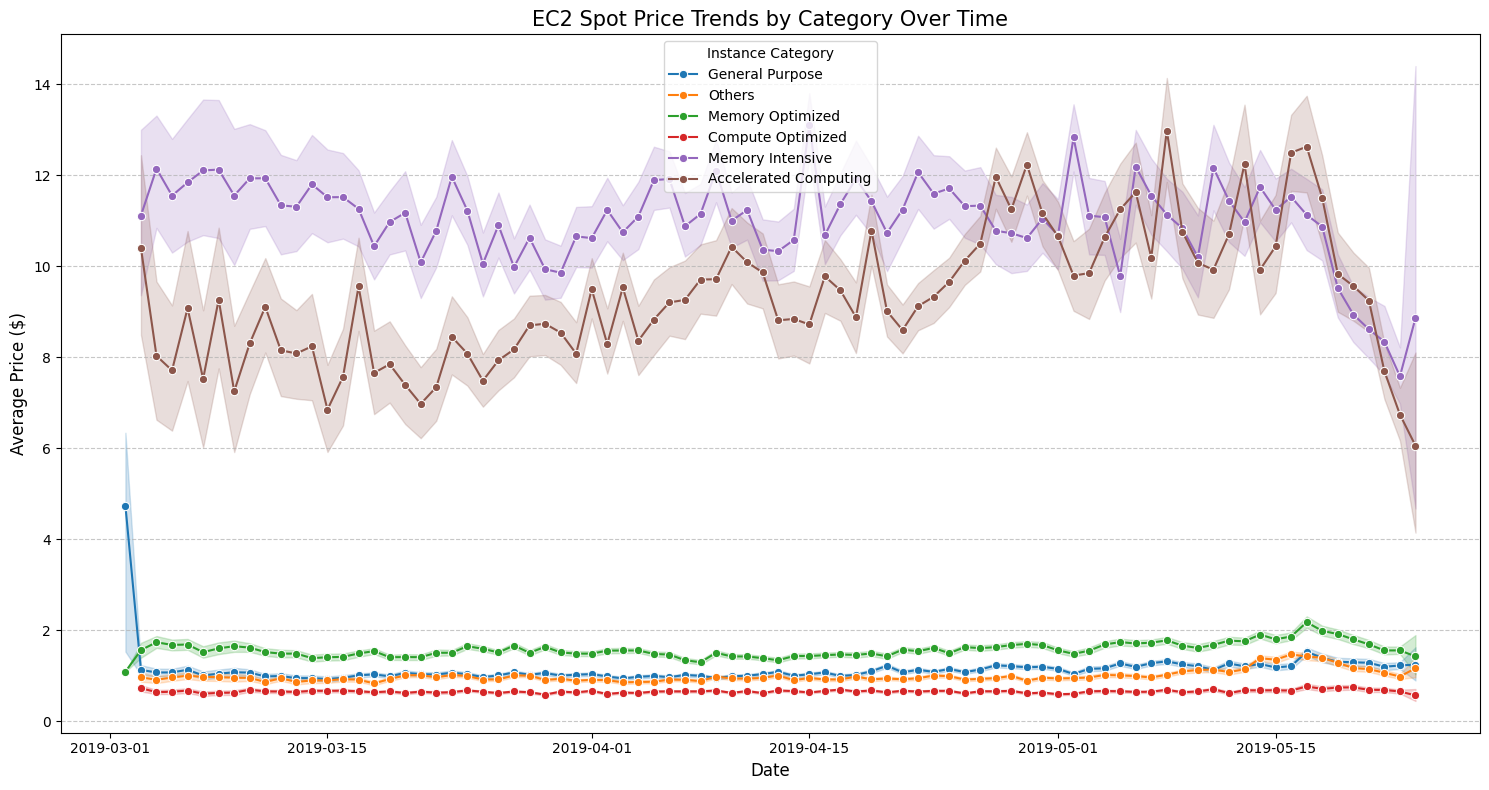

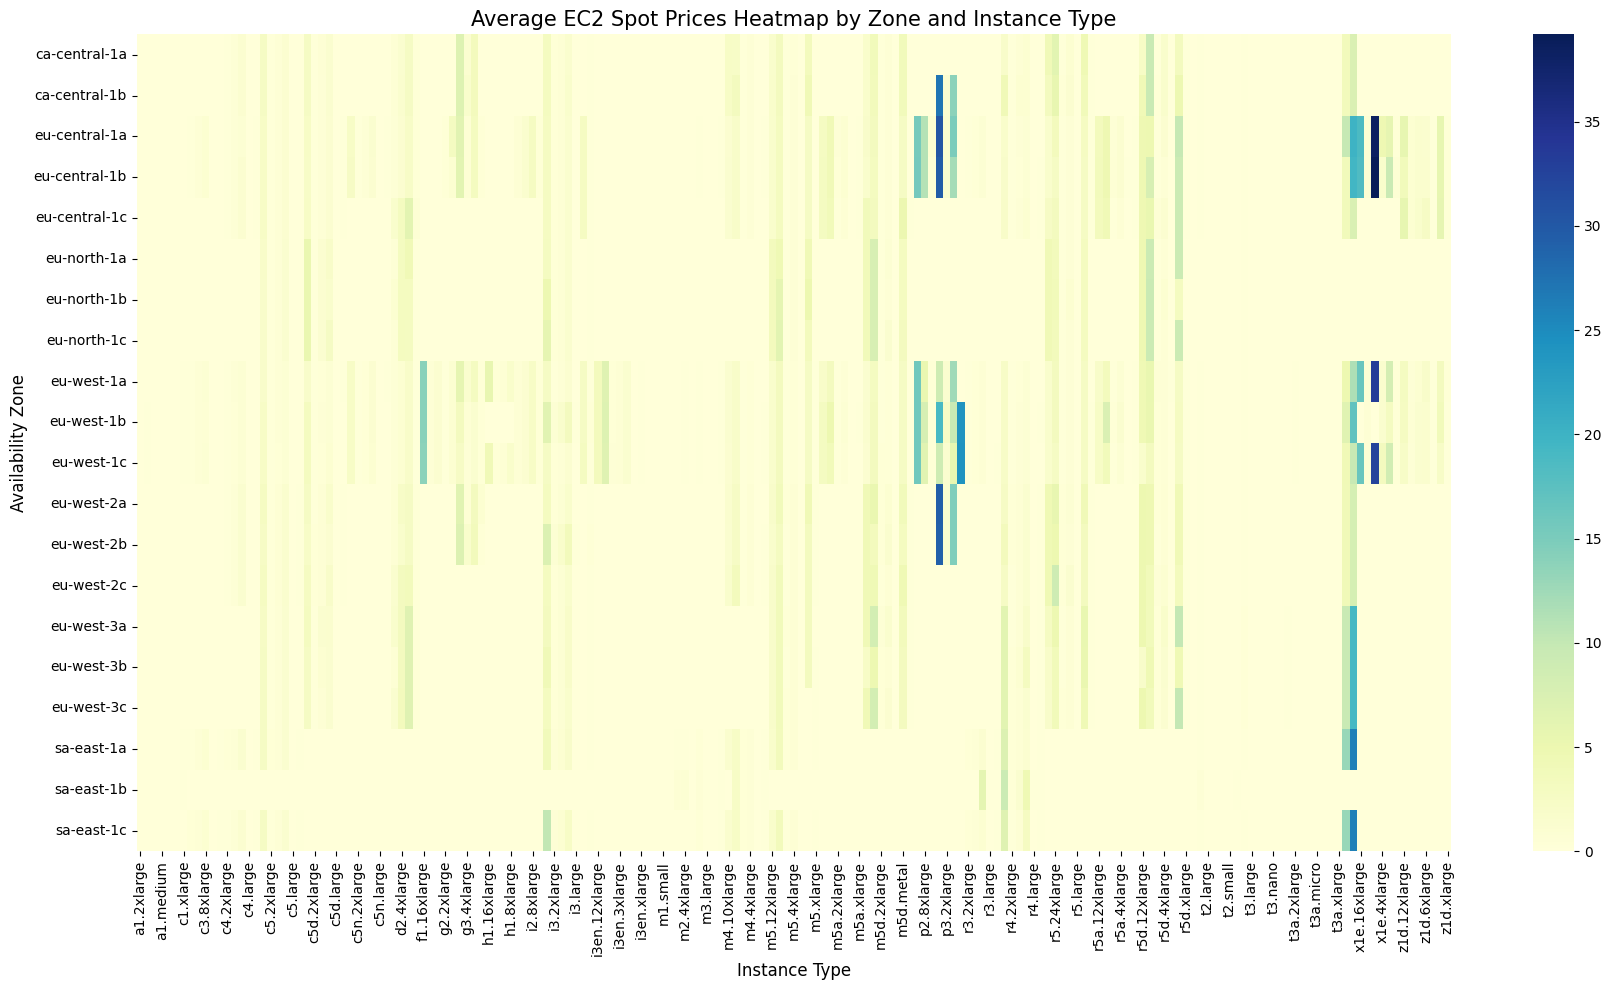

In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType, TimestampType
from pyspark.sql.functions import avg, trim, to_date
import zipfile
import os

# --- Initialize Spark Session ---
spark = SparkSession.builder \
    .appName("EC2 Spot Instance Price Analysis") \
    .getOrCreate()

# --- Part a) Extract and Load EC2 Spot Data ---
def extract_and_load_zip(zip_file_path, extract_dir):
    """
    Extracts all .gz files from a zip archive and loads them into a Spark DataFrame.
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    dataframes = []
    for root, _, files in os.walk(extract_dir):
        for file in files:
            if file.endswith(".gz"):
                file_path = os.path.join(root, file)
                df = load_ec2_spot_data(file_path)
                dataframes.append(df)

    # Union all DataFrames into one
    combined_df = dataframes[0]
    for df in dataframes[1:]:
        combined_df = combined_df.union(df)

    return combined_df

# --- Part a) Load EC2 Spot Data with Correct Delimiter and Skip Header ---
def load_ec2_spot_data(file_path):
    """
    Reads a compressed .gz file and returns a Spark DataFrame
    with the appropriate schema, excluding the 'Type' column.
    """
    schema = StructType([
        StructField("Type", StringType(), True),
        StructField("Price", FloatType(), True),
        StructField("Timestamp", TimestampType(), True),
        StructField("InstanceType", StringType(), True),
        StructField("ProductDescription", StringType(), True),
        StructField("AvailabilityZone", StringType(), True)
    ])

    # Load the file into a DataFrame using tab as the delimiter and skip the header
    df = spark.read \
        .option("delimiter", "\t") \
        .option("header", "true") \
        .schema(schema) \
        .csv(file_path)

    # Clean up whitespace and drop the 'Type' column
    df_cleaned = df.withColumn("InstanceType", trim(df["InstanceType"])) \
                   .withColumn("ProductDescription", trim(df["ProductDescription"])) \
                   .withColumn("AvailabilityZone", trim(df["AvailabilityZone"])) \
                   .drop("Type")

    return df_cleaned

# --- Categorize Instance Types ---
def categorize_instance_type(instance_type):
    if instance_type.startswith('c'):
        return 'Compute Optimized'
    elif instance_type.startswith('m'):
        return 'General Purpose'
    elif instance_type.startswith('r'):
        return 'Memory Optimized'
    elif instance_type.startswith('x'):
        return 'Memory Intensive'
    elif instance_type.startswith('p'):
        return 'Accelerated Computing'
    else:
        return 'Others'

# --- Part c) Improved Visualization of Price Trends Over Time ---
def visualize_price_trends(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    pandas_df = df.withColumn("Date", to_date(df["Timestamp"])).toPandas()
    pandas_df['Category'] = pandas_df['InstanceType'].apply(categorize_instance_type)

    plt.figure(figsize=(15, 8))
    sns.lineplot(data=pandas_df, x="Date", y="Price", hue="Category", marker="o")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Average Price ($)", fontsize=12)
    plt.title("EC2 Spot Price Trends by Category Over Time", fontsize=15)
    plt.legend(title="Instance Category")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Heatmap Visualization for Average Prices ---
def visualize_heatmap(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    pandas_df = df.toPandas()
    heatmap_data = pandas_df.groupby(['AvailabilityZone', 'InstanceType'])['Price'].mean().unstack().fillna(0)

    plt.figure(figsize=(18, 10))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
    plt.xlabel("Instance Type", fontsize=12)
    plt.ylabel("Availability Zone", fontsize=12)
    plt.title("Average EC2 Spot Prices Heatmap by Zone and Instance Type", fontsize=15)
    plt.tight_layout()
    plt.show()

# --- Example Usage ---
zip_file = "dataset-EC2-series.zip"
extract_dir = "extracted_data"

df_spot_prices = extract_and_load_zip(zip_file, extract_dir)
visualize_price_trends(df_spot_prices)
visualize_heatmap(df_spot_prices)


spark.stop()




#### **1. EC2 Spot Price Trends by Category Over Time**

**Plot Type:** Line Plot with Confidence Intervals  
**X-axis:** Date  
**Y-axis:** Average Price ($)  
**Legend:** EC2 Instance Categories (General Purpose, Memory Optimized, Compute Optimized, Memory Intensive, Accelerated Computing, Others)

**Interpretation:**  
- The plot shows the evolution of EC2 spot instance prices over time across different instance categories.  
- **Memory Intensive** and **Accelerated Computing** instances consistently have higher spot prices, reflecting their resource-intensive workloads.  
- **General Purpose** and **Compute Optimized** instances maintain relatively stable and lower prices.  
- The shaded regions around the lines represent price variability, showing the price volatility for each category.  
- A slight price increase is observed for most categories towards mid-May 2019, potentially due to increased demand or reduced supply.

---

#### **2. Average EC2 Spot Prices Heatmap by Zone and Instance Type**


**Interpretation:**  
- The heatmap visualizes how spot prices vary across different **Availability Zones** and **Instance Types**.  
- Zones like **`eu-central-1a`**, **`eu-west-1b`**, and **`eu-west-1c`** show relatively higher prices for resource-heavy instance types (e.g., **`x1e.32xlarge`**, **`p3.16xlarge`**).  
- General-purpose instances (e.g., **`t2.micro`**, **`m5.large`**) maintain lower, consistent prices across zones.  
- The clustering of high-price instances in specific zones suggests that certain zones experience higher demand for specialized instance types.

---

### **Overall Analysis**

1. **Category Impact:**  
   - **Memory Intensive** and **Accelerated Computing** categories are the most expensive, likely due to the specialized workloads they support (e.g., big data processing, AI/ML workloads).
   - **General Purpose** and **Compute Optimized** instances are more affordable and stable, suitable for standard applications.

2. **Geographical Influence:**  
   - Certain **Availability Zones** like **`eu-central-1a`** and **`eu-west-1b`** show spikes in pricing for specific instances, indicating regional demand or capacity limitations.

3. **Time-Based Trends:**  
   - Spot prices generally fluctuate over time, but specific categories exhibit more volatility.  
   - Potential seasonal demand or infrastructure changes might have influenced the price surge in May 2019.

These visualizations provide actionable insights for selecting **cost-efficient** EC2 instances based on instance types, regions, and workload requirements.